In [1]:
import pandas as pd
import numpy as np
import joblib
import os
import json
from collections import Counter
import re
import tqdm
from datetime import datetime

### sklearn dependencies
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import TruncatedSVD
from sklearn.mixture import BayesianGaussianMixture
from sklearn.model_selection import GridSearchCV
from scipy import sparse

### text preprocessing dependencies
import nltk
from nltk.tokenize.casual import TweetTokenizer
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

### gensim dependencies
from gensim.models import Word2Vec, KeyedVectors
from gensim.test.utils import datapath

[nltk_data] Downloading package wordnet to /home/datallah/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
sens_df = pd.read_csv('/home/datallah/datallah-jaymefis-gibsonce/bgmm/sensitivity.csv')
sens_df

,n_componenets,max_log_likelihood,train_time
0,1,196.571352,2.0
1,2,243.113401,94.0
2,3,260.996055,235.0
3,4,290.687484,185.0
4,5,302.539346,354.0
5,6,311.824501,267.0
6,7,319.210923,363.0
7,8,316.059808,215.0
8,9,324.160091,451.0
9,10,329.431508,446.0


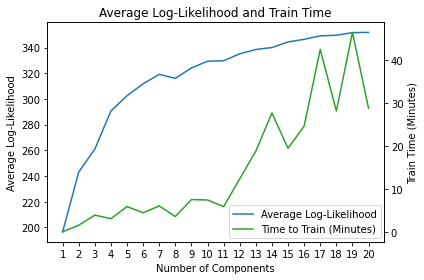

In [31]:
import matplotlib.pyplot as plt

# Create figure and axis objects
fig, ax1 = plt.subplots()

# Plot log likelihood on first y-axis
ax1.plot(sens_df.n_componenets, sens_df.max_log_likelihood, color='tab:blue', label='Average Log-Likelihood')
ax1.set_xlabel('Number of Components')
ax1.set_ylabel('Average Log-Likelihood')
ax1.tick_params(axis='y')

# Create second y-axis
ax2 = ax1.twinx()
# Plot time to train on second y-axis
ax2.plot(sens_df.n_componenets, sens_df.train_time/60, color='tab:green', label='Time to Train (Minutes)')
ax2.set_ylabel('Train Time (Minutes)')
ax2.tick_params(axis='y')

# Title and legend
plt.title('Average Log-Likelihood and Train Time')
fig.tight_layout()
fig.legend(bbox_to_anchor=(0.902, 0.29))

# Apply Matplotlib's blue theme
plt.style.use('seaborn-dark-palette')

plt.xticks(sens_df.n_componenets)

# Show plot
plt.show()